### Creating a Passes location maps & a Passes heat map

**Passes location** Gives you the percentage/number of passes that a team has made in a specific area of the pitch, You can customize how you divide the pitch

**Heat Map**  heat maps are used as an indicator of the scope and frequency of a player's(teams)  movement/actions, helping the sports analysts to identify playing conditions and in-game situations of players/teams. 

##### Data:
for this use case I used data that I've pulled from statsbomb for the game brtween Juventus and Real Madrid in the 2016/2017 UCL final, To pull the data I used the statsbomb API https://github.com/statsbomb/statsbombpy

**Note:** This data is available for public access

#### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mplsoccer.pitch import Pitch
from mplsoccer.pitch import VerticalPitch
from scipy.ndimage import gaussian_filter

#### Importing data

In [ ]:
# Using Statsbomb API
pip install statsbombpy

In [2]:
from statsbombpy import sb

In [3]:
sb.competitions().head(10)

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,16,4,Europe,Champions League,male,False,False,2018/2019,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-07-09T14:06:05.802
1,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
2,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
3,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,26,Europe,Champions League,male,False,False,2014/2015,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
5,16,25,Europe,Champions League,male,False,False,2013/2014,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
6,16,24,Europe,Champions League,male,False,False,2012/2013,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-07-10T13:41:45.751
7,16,23,Europe,Champions League,male,False,False,2011/2012,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
8,16,22,Europe,Champions League,male,False,False,2010/2011,2022-01-26T21:07:11.033473,2021-06-13T16:17:31.694,None,2022-01-26T21:07:11.033473
9,16,21,Europe,Champions League,male,False,False,2009/2010,2022-02-12T16:13:49.294747,2021-06-13T16:17:31.694,None,2022-02-12T16:13:49.294747


In [4]:
# Selecting the match we want to pull the data for
sb.matches(competition_id=16,season_id=2)

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,18244,2017-06-03,20:45:00.000,Europe - Champions League,2016/2017,Juventus,Real Madrid,1,4,available,...,2021-06-13T16:17:31.694,7,Final,Principality Stadium,Felix Brych,Massimiliano Allegri,Zinédine Zidane,1.0.3,None,None


In [5]:
events=sb.events(match_id=18244)
events.head(10)

,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,carry_end_location,clearance_aerial_won,counterpress,dribble_outcome,dribble_overrun,...,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",Juventus,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'formation': 41212, 'lineup': [{'player': {'i...",Real Madrid,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Real Madrid,00:00:00.000,Half Start,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Juventus,00:00:00.000,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Real Madrid,00:00:00.000,Half Start,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Juventus,00:00:00.000,Half Start,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Juventus,00:00:01.235,Pass,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Juventus,00:00:04.137,Pass,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Juventus,00:00:17.055,Pass,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Juventus,00:00:18.785,Pass,True


In [6]:
# Review the available columns
events.columns

Index(['50_50', 'bad_behaviour_card', 'ball_receipt_outcome',
       'ball_recovery_recovery_failure', 'block_deflection',
       'carry_end_location', 'clearance_aerial_won', 'counterpress',
       'dribble_outcome', 'dribble_overrun', 'duel_outcome', 'duel_type',
       'duration', 'foul_committed_advantage', 'foul_committed_card',
       'foul_committed_offensive', 'foul_committed_type', 'foul_won_advantage',
       'foul_won_defensive', 'goalkeeper_body_part', 'goalkeeper_end_location',
       'goalkeeper_outcome', 'goalkeeper_position', 'goalkeeper_technique',
       'goalkeeper_type', 'id', 'index', 'interception_outcome', 'location',
       'match_id', 'minute', 'off_camera', 'pass_aerial_won', 'pass_angle',
       'pass_assisted_shot_id', 'pass_backheel', 'pass_body_part',
       'pass_cross', 'pass_cut_back', 'pass_deflected', 'pass_end_location',
       'pass_goal_assist', 'pass_height', 'pass_length', 'pass_outcome',
       'pass_recipient', 'pass_shot_assist', 'pass_switch'

In [7]:
# filtering out the data that we won't use
events=pd.DataFrame(events[["team","player","type","location","minute"]]).reset_index()
passes=events.loc[(events["team"]=="Real Madrid")&(events["type"]=="Pass")]
passes

,index,team,player,type,location,minute
10,10,Real Madrid,Daniel Carvajal Ramos,Pass,"[29.0, 73.0]",0
11,11,Real Madrid,Luka Modrić,Pass,"[36.0, 75.0]",0
24,24,Real Madrid,Toni Kroos,Pass,"[15.0, 54.0]",0
25,25,Real Madrid,Raphaël Varane,Pass,"[27.0, 56.0]",1
26,26,Real Madrid,Luka Modrić,Pass,"[43.0, 64.0]",1
...,...,...,...,...,...,...
1000,1000,Real Madrid,Marco Asensio Willemsen,Pass,"[78.0, 78.0]",92
1001,1001,Real Madrid,Daniel Carvajal Ramos,Pass,"[68.0, 76.0]",92
1002,1002,Real Madrid,Gareth Frank Bale,Pass,"[69.0, 15.0]",93
1003,1003,Real Madrid,Sergio Ramos García,Pass,"[55.0, 27.0]",93


#### Data Preparation

In [8]:
# Separate the location coordinates
location_xy=passes.location.apply(pd.Series)
location_xy.columns=["x","y"]
location_xy.dropna()
location_xy

,x,y
10,29.0,73.0
11,36.0,75.0
24,15.0,54.0
25,27.0,56.0
26,43.0,64.0
...,...,...
1000,78.0,78.0
1001,68.0,76.0
1002,69.0,15.0
1003,55.0,27.0


#### Plotting

* Pass Locations

Text(0.5, 0.98, 'Passes Location for Real Madrid against Juventus in the 2016/2017 UCL Final')

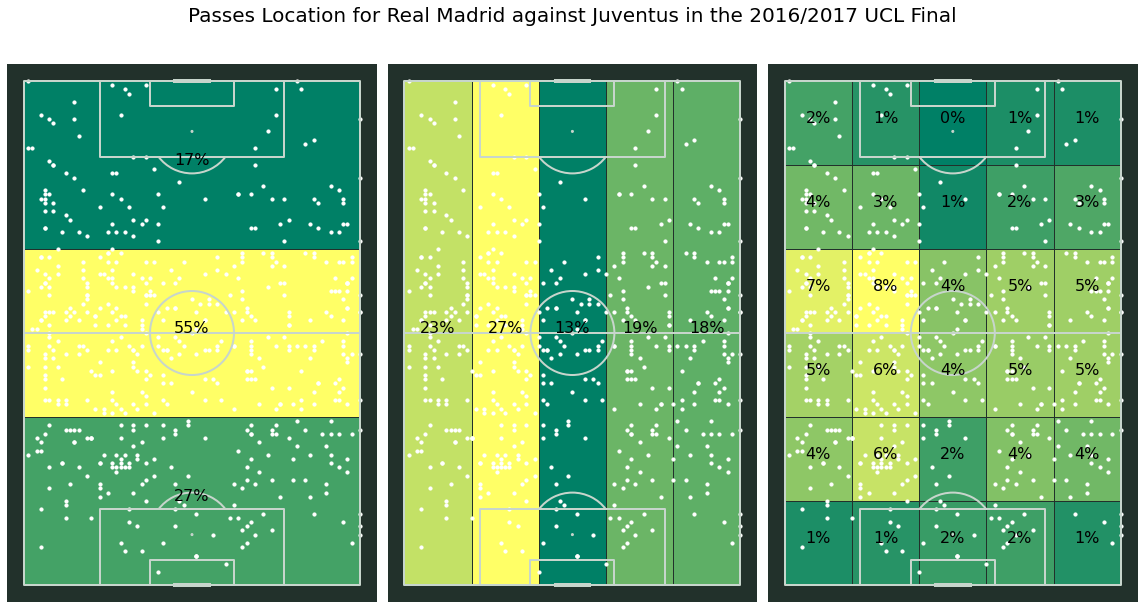

In [9]:
#Plotting the pitch
pitch = VerticalPitch(pitch_type='statsbomb', orientation='vertical',layout=(1,3),line_zorder=2,
              pitch_color='#22312b', line_color='#c7d5cc', figsize=(16,9))
fig, ax=pitch.draw(figsize=(16, 9),  nrows=1,  ncols=3)

# plotting the map
bins=[(3,1),(1,5),(6,5)]
for i,bin in enumerate(bins):
    #count the passes
    bin_stats=pitch.bin_statistic(location_xy["x"],location_xy["y"],statistic="count",bins=bin)
    # plotting the heatmap based on passes count
    pitch.heatmap(bin_stats,ax=ax[i],cmap="summer",edgecolors="#22312b")
    # plotting the passeslocations
    pitch.scatter(location_xy["x"],location_xy["y"],c="white",ax=ax[i],s=10)
    # Adding the pass percentage in each pitch segment
    bin_stats["statistic"]=(pd.DataFrame((bin_stats["statistic"]/bin_stats["statistic"].sum())).applymap(lambda x:'{:.0%}'.format(x)).values)
    pitch.label_heatmap(bin_stats,color='black',fontsize=16,ax=ax[i],ha="center")



fig.suptitle("Passes Location for Real Madrid against Juventus in the 2016/2017 UCL Final",fontsize=20)


* The heatMap

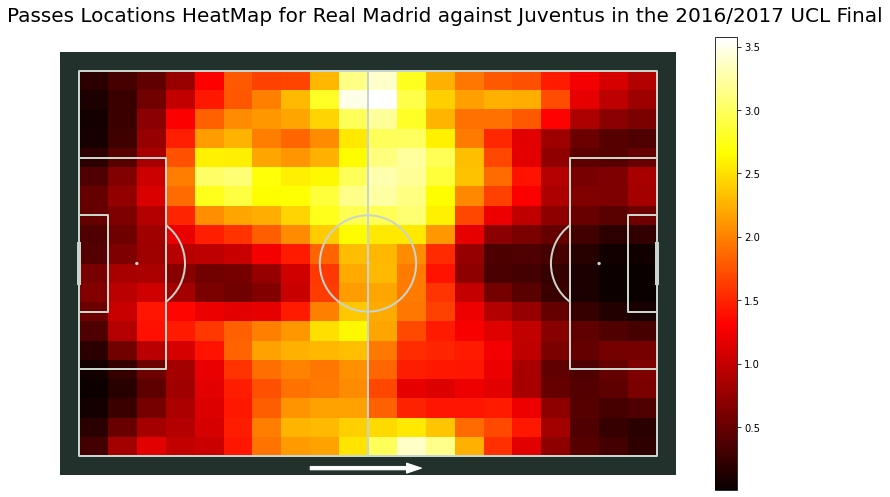

In [37]:
#Plotting the pitch
pitch = Pitch(pitch_type='statsbomb', orientation='horizontal',
              pitch_color='#22312b', line_color='#c7d5cc', figsize=(11, 7),line_zorder=2)
fig,ax=pitch.draw(figsize=(11, 7),  nrows=1,  ncols=1)

# plotting the map
#plt.style.use("dark_background")
bin_stats=pitch.bin_statistic(location_xy.x,location_xy.y,statistic="count",bins=(20,20))
bin_stats["statistic"]=gaussian_filter(bin_stats["statistic"],1)
pcm=pitch.heatmap(bin_stats,ax=ax,cmap="hot")

fig.suptitle("Passes Locations HeatMap for Real Madrid against Juventus in the 2016/2017 UCL Final",fontsize=20)
cbar=fig.colorbar(pcm,ax=ax)
plt.arrow(48, 82.5, 20, 0, width = 0.7,color="white")